In [1]:
import os
from abc import ABC, abstractmethod
from datetime import datetime
from typing import List
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from preprocess_for_eda import PreprocessData
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from itertools import combinations

In [2]:
class Plot(ABC):
    @abstractmethod
    def plot():
        raise NotImplementedError("Plotting has to have function that does the plotting")
    
    @abstractmethod
    def save_plot():
        raise NotImplementedError("Plotting has to have function that does the plotting")

In [ ]:
@dataclass
class DataEncoder:
    data: pd.DataFrame
    def one_hot_encode(self, column: str) -> pd.DataFrame:
        column = [column]
        enc = OneHotEncoder(sparse_output=False)
        encoded_array = enc.fit_transform(self.data.loc[:, column])
        df_encoded = pd.DataFrame(encoded_array, columns=enc.get_feature_names_out())
        self.data = pd.concat([self.data, df_encoded], axis=1)
        self.data.drop(labels = column, axis=1, inplace=True)
        return self.data
    
    def label_encode(self, column: str) -> pd.DataFrame:
        enc = LabelEncoder()
        self.data[f"{column}_enc"] = enc.fit_transform(self.data[column])
        return self.data
    
    def encode(self, col_type_dict: Dict[str]) -> pd.DataFrame:
        for k, v in col_type_dict.items():
            if v.lower() in ['one_hot', "one_hot_encoder"]:
                self.data = self.one_hot_encode(k)
            elif v.lower() in ["label", "dummy", "lable_encoder", "dummy_encoder"]:
                self.data = self.label_encode(k)
        return self.data

In [ ]:
@dataclass
class BoxPlot(Plot):
    fig: int
    ax: int
    data: pd.DataFrame
    
    def __plot(self, x: str, y: str) -> None:
        plt.clf()
        fig, ax = plt.subplots(figsize = (self.fig, self.ax))
        return sns.boxplot(x=x, y=y, data = self.data , orient="h", palette = 'magma')
    
    def plot(self, to_vizualize: List[Tuple[str]]) -> None:
        for pair in to_vizualize:
            x = pair[0]
            y = pair[1]
            self.__plot(x, y)
            
    def save_plot(self, to_vizualize: List[Tuple[str]], save_path: str) -> None:
        for pair in to_vizualize:
            x = pair[0]
            y = pair[1]
            self.__plot(x, y).get_figure().savefig(f"{save_path}/{x}_{y}.png")


In [ ]:
@dataclass
class CorrelationPlot(Plot):
    data: pd.DataFrame
    fig: int
    ax: int
    
    def __get_correlation(self) -> pd.DataFrame:
        return self.data.corr()
    
    def __get_plot_params(self):
        corr = self.__get_correlation()
        f, ax = plt.subplots(figsize=(self.fig, self.ax))
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        return corr, f, ax, cmap
        
    def save_plot(self, save_path: str) -> None:
        corr, f, ax, cmap = self.__get_plot_params()
        sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, annot=True, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})
        plt.savefig(save_path)
        
    
    def plot(self) -> None:
        corr, f, ax, cmap = self.__get_plot_params()
        sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, annot=True, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
@dataclass
class PairPlot(Plot):
    data: pd.DataFrame
    fig: int
    ax: int
    
    def plot(self) -> None:
        f, ax = plt.subplots(figsize=(self.fig, self.ax))
        g = sns.pairplot(self.data, diag_kind="kde")
    
    def save_plot(self, save_file_path: str) -> None:
        f, ax = plt.subplots(figsize=(self.fig, self.ax))
        g = sns.pairplot(self.data, diag_kind="kde")
        g.figure.savefig("test.png")

In [3]:
data_path = "../data/csv"
input_data_parser = PreprocessData(data_path)
data = input_data_parser.prepare_for_eda()
data

,div,date,time,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,...,ast,hf,af,hc,ac,hy,ay,hr,ar,numerical_time
0,E1,2019-08-02,19:45,Luton,Middlesbrough,3,3,D,2,2,...,8,14,20,8,11,2,2,0,0,18.333333
1,E1,2019-08-03,15:00,Barnsley,Fulham,1,0,H,1,0,...,4,16,14,7,5,3,1,0,0,10.000000
2,E1,2019-08-03,15:00,Blackburn,Charlton,1,2,A,0,1,...,5,15,13,12,2,0,3,0,0,10.000000
3,E1,2019-08-03,15:00,Brentford,Birmingham,0,1,A,0,1,...,1,10,12,6,2,1,3,0,0,10.000000
4,E1,2019-08-03,15:00,Millwall,Preston,1,0,H,1,0,...,0,11,18,8,7,2,3,0,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,E1,2021-05-08,12:30,Middlesbrough,Wycombe,0,3,A,0,2,...,5,11,15,6,6,0,1,0,0,10.000000
2792,E1,2021-05-08,12:30,Nott'm Forest,Preston,1,2,A,1,0,...,3,10,12,4,3,1,1,0,0,10.000000
2793,E1,2021-05-08,12:30,QPR,Luton,3,1,H,1,1,...,4,14,6,8,6,1,1,0,0,10.000000
2794,E1,2021-05-08,12:30,Reading,Huddersfield,2,2,D,2,1,...,4,5,10,3,3,1,1,0,0,10.000000


<pre>
Notes for Football Data

All data is in csv format, ready for use within standard spreadsheet applications. Please note that some abbreviations are no longer in use (in particular odds from specific bookmakers no longer used) and refer to data collected in earlier seasons. For a current list of what bookmakers are included in the dataset please visit http://www.football-data.co.uk/matches.php

Key to results data:

Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HFKC = Home Team Free Kicks Conceded
AFKC = Away Team Free Kicks Conceded
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)
</pre>

<pre>
1. nothing is higly negatively correlated
2. shots / corners of both teams are correlated, 
     a. home team - home team positively 
     b. home team - away team negatively
3. Half time goals correlated with full time goals
     a. home team - away team not correlated
     b. home team - home team strongly positively correlated
4. Other than that nothing much correlated
</pre>

### Because I will try to predict goals, I will delte half time goals going forward


In [5]:
data = data.drop(columns = ['hthg', "htag"])

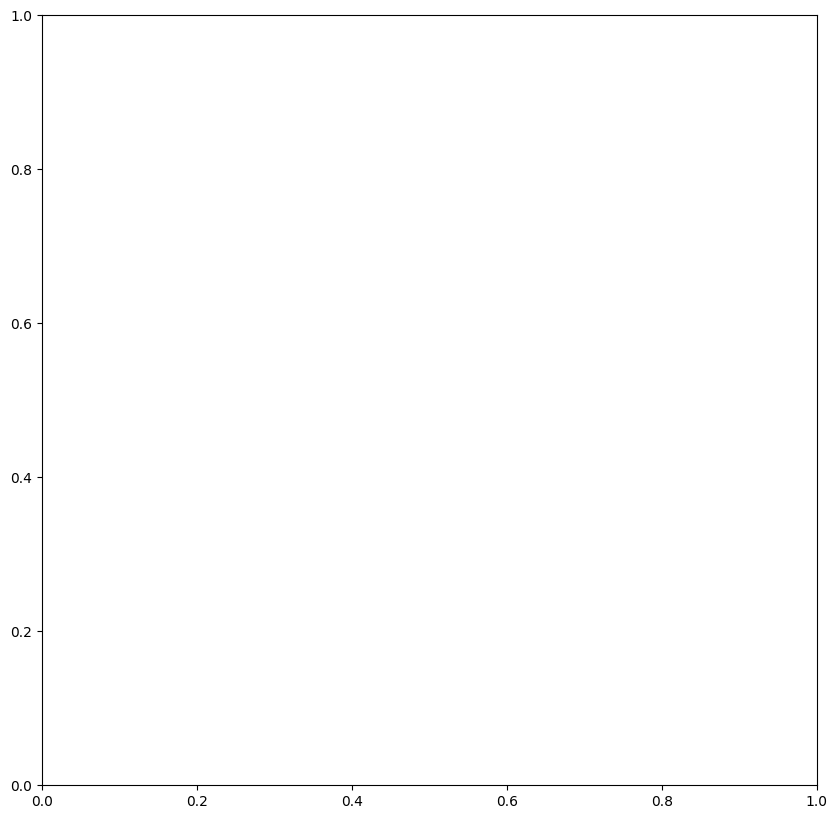

In [6]:
@dataclass
class PairPlot(Plot):
    data: pd.DataFrame
    fig: int
    ax: int
    
    def plot(self) -> None:
        f, ax = plt.subplots(figsize=(self.fig, self.ax))
        g = sns.pairplot(self.data, diag_kind="kde")
    
    def save_plot(self, save_file_path: str) -> None:
        f, ax = plt.subplots(figsize=(self.fig, self.ax))
        g = sns.pairplot(self.data, diag_kind="kde")
        g.figure.savefig("test.png")
        
PairPlot(data, 10, 10).save_plot("../data/pictures/pair_plot.png")

### Distribution plot
<pre>
    1. Goals, cornerrs, free kicks are skewed, binomial or poisson distribution, for n >= 30 binomial -> poisson
    2. Fouls seem to be normally distributed
    3. Red cards are seem to be poisosn/gaussian or multibnomially distributed
</pre>

Next will try to look for outliers in data etc or how are the variances for the league and for teams

In [ ]:
cat = {
    "D": 0,
    "H": 1,
    "A": -1
}
data['htr'] = data['htr'].apply(lambda x: cat.get(x))
data['ftr'] = data['ftr'].apply(lambda x: cat.get(x))

cols = ['hometeam', 'awayteam', 'referee']
for col in cols:
    data = DataEncoder(data).label_encode(col)


In [ ]:
col_combinations = list(combinations(data.columns, 2))
for col_comb in col_combinations:
    try:
        print(col_comb)
        BoxPlot(data=data, fig=12, ax=12).save_plot(
            to_vizualize = [col_comb],
            save_path = "../data/pictures"
            )
    except TypeError:
        pass

### Box Plots
<pre>
1. No visible trend in red (yellow) card / free kicks
2. Fouls and cards related (duh)
3. Shots corners related
4. Till 3-4 yellow cards there is not big dropout from shots (away) by home team till 6 yellow cards
</pre>